In [16]:
from joblib import load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import ma, cm
import seaborn as sns
import statsmodels.api as sm
import plot_config
from sklearn.metrics import cohen_kappa_score, accuracy_score
from imblearn.metrics import geometric_mean_score
plot_config.set_config()

In [2]:
experiment = 'elec2'
name_caps = 'Electricity'

In [3]:
off_scores = load('../data/'+experiment+'/off_scores.joblib')
off_preds = load('../data/'+experiment+'/off_preds.joblib')
off_targets = load('../data/'+experiment+'/off_targets.joblib')

FileNotFoundError: [Errno 2] No such file or directory: '../data/elec2/off_scores.joblib'

In [ ]:
kappas = []
gmeans = []
accurs = []
for i in range(100):
    scores = off_scores[300+i:300+i+10]
    app = [i for i,(x,y) in enumerate(scores) if abs(x-y)>0.1]
    preds = off_preds[i][app]
    targets = off_targets[i][app]
    
    if not np.isnan(geometric_mean_score(targets, preds)):
        gmeans.append(geometric_mean_score(targets, preds))
        
    if not np.isnan(accuracy_score(targets, preds)):
        accurs.append(accuracy_score(targets, preds))
        
    if np.array_equal(preds, targets):
        kappas.append(1.0)
    else:
        kappas.append(cohen_kappa_score(targets, preds))
print(np.mean(kappas), "+-", np.std(kappas))
print(np.mean(gmeans), "+-", np.std(gmeans))
print(np.mean(accurs), "+-", np.std(accurs))

In [ ]:
rf_score = load('../data/'+experiment+'/score_rf.joblib')[:120]
svm_score = load('../data/'+experiment+'/score_svm.joblib')[:120]
score_recommended = np.array(load('../data/'+experiment+'/score_reco.joblib'))[:120]
fig = plt.gcf()
fig.set_size_inches(7.14, 2)
plt.plot(rf_score, '^-', label='RF')
plt.plot(svm_score, '^-', label='SVM*')
plt.plot(score_recommended, 'k^-', label='Recommended+')
plt.xlabel('Time')
plt.ylabel('Score')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), ncol=3, fancybox=True)
plt.savefig(experiment+'_tscores.pdf', bbox_inches='tight')

In [4]:
exps_fi = {}
for exp in ['elec2', 'covtype', 'powersupply']:
    t_importance = load('../data/'+exp+'/importance.joblib')
    t_fname = load('../data/'+exp+'/fnames.joblib')[:-1]
    exps_fi[exp] = dict(sorted(zip(t_fname,t_importance), key=lambda x: x[1], reverse=True)[:5])
    
#t_importance = load('../data/'+experiment+'/importance.joblib')
#t_fname = load('../data/'+experiment+'/fnames.joblib')[:-1]
    
#dic = sorted([(k,v) for k,v in zip(t_importance, t_fname)])[-5:]
#importance = [k for k,v in dic]
#fname = [v for k,v in dic]
pos = np.arange(4,-1,-1)

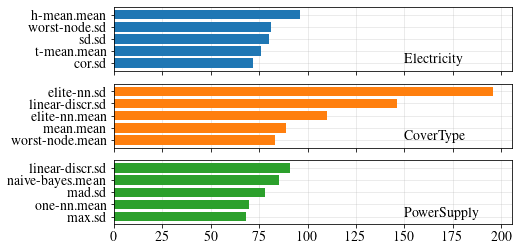

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True)
fe2 = exps_fi['elec2']
ax1.barh(pos, fe2.values(), align='center', tick_label=[x.replace('_','-') for x in fe2.keys()], label='Electricity')

ax1.text(150, 0, 'Electricity')

fct = exps_fi['covtype']
ax2.barh(pos, fct.values(), align='center', tick_label=[x.replace('_','-') for x in fct.keys()], color='C1',
         label='CoverType')
ax2.text(150, 0, 'CoverType')

fps = exps_fi['powersupply']
ax3.barh(pos, fps.values(), align='center', tick_label=[x.replace('_','-') for x in fps.keys()], color='C2',
        label='PowerSupply')
ax3.text(150, 0, 'PowerSupply')

fig.set_size_inches(7.14, 4)
plt.savefig('general_fi.pdf', bbox_inches='tight')

In [6]:
translate = {'elec2':'Electricity', 'covtype':'CoverType', 'powersupply':'PowerSupply'}

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


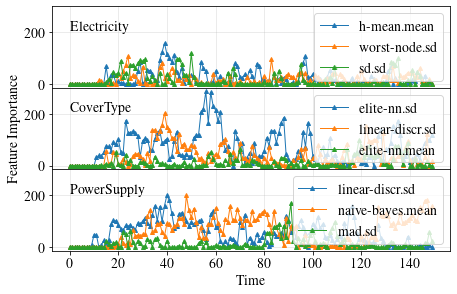

In [7]:
fig, ax = plt.subplots(3, sharex=True, sharey=True, gridspec_kw={'hspace': 0})

for i, exp in enumerate(['elec2', 'covtype', 'powersupply']):
    tfi = load('../data/'+exp+'_ninc/tfi.joblib')[:150]
    topfname = list(exps_fi[exp].keys())[:3]
    t_fname = load('../data/'+exp+'/fnames.joblib')[:-1]
    tfi = pd.DataFrame(tfi, columns=t_fname)[topfname]
    tfi.rename(columns={x:x.replace('_','-') for x in topfname}, inplace=True)
    ax[1].set_ylabel('Feature Importance')
    ax[i].text(0, 210, translate[exp])
    for cols in tfi.iteritems():
        ax[i].plot(cols[1], '^-', label=cols[0])
        ax[i].legend(loc='right')

fig.set_size_inches(7.14, 4.5)
plt.xlabel('Time')
plt.savefig('general_timefi.pdf', bbox_inches='tight')

In [8]:
arange = 1000
difference = np.array(load('../data/'+experiment+'/difference.joblib'))
difference_ninc = np.array(load('../data/'+experiment+'_ninc/difference.joblib'))
cum = np.cumsum(difference)[:arange]
cum_ninc = np.cumsum(difference_ninc)[:arange]
x = np.arange(arange)

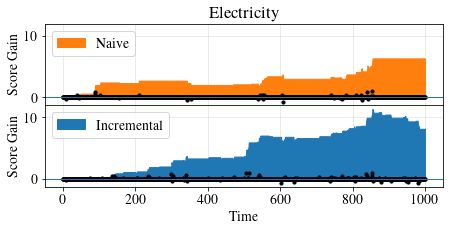

In [9]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True, gridspec_kw={'hspace': 0})

ax1.fill_between(x, cum_ninc, 0, color='C1', label='Naive')
ax1.scatter(x, difference_ninc[:arange], s=10, c='black')
ax1.set_title(name_caps)
ax1.axhline(0)
ax1.legend(loc='upper left')
ax1.set_ylabel('Score Gain')

ax2.fill_between(x, cum, 0, color='C0', label='Incremental')
ax2.scatter(x, difference[:arange], s=10, c='black')
ax2.axhline(0)
ax2.legend(loc='upper left')
ax2.set_ylabel('Score Gain')
ax2.set_xlabel('Time')

fig = plt.gcf()
fig.set_size_inches(7.14, 3)
plt.savefig(experiment+'_cumsum.pdf', bbox_inches='tight')

In [10]:
print(cum[-10:])

[8.1 8.1 8.1 8.1 8.1 8.1 8.1 8.1 8.1 8.1]


In [11]:
with open('../'+experiment.replace('_','-')+'.output') as fin:
    print(fin.read())


  0%|          | 0/2 [00:00<?, ?it/s][FINETUNING BASE MODELS]

100%|██████████| 2/2 [02:31<00:00, 75.56s/it]

  0%|          | 0/400 [00:00<?, ?it/s] * Warning: Input data for shapiro has range zero. The results may not be accurate.

  0%|          | 1/400 [00:03<20:11,  3.04s/it] * Warning: It is not possible make equal discretization
 * Warning: Input data for shapiro has range zero. The results may not be accurate.

  0%|          | 2/400 [00:06<20:50,  3.14s/it] * Warning: It is not possible make equal discretization
 * Warning: Input data for shapiro has range zero. The results may not be accurate.

  1%|          | 3/400 [00:09<20:33,  3.11s/it] * Warning: It is not possible make equal discretization
 * Warning: Input data for shapiro has range zero. The results may not be accurate.

  1%|          | 4/400 [00:12<20:36,  3.12s/it] * Warning: It is not possible make equal discretization
 * Warning: Input data for shapiro has range zero. The results may not be accurate.

  1%|▏   

In [12]:
metadf = load('../data/'+experiment+'/metadf.joblib')
best = np.array(load('../data/'+experiment+'/best.joblib'))
score_recommended = np.array(load('../data/'+experiment+'/score_reco.joblib'))
score_default = np.array(load('../data/'+experiment+'/score_def.joblib'))


score_recommended_ninc = np.array(load('../data/'+experiment+'_ninc/score_reco.joblib'))
score_default_ninc = np.array(load('../data/'+experiment+'_ninc/score_def.joblib'))

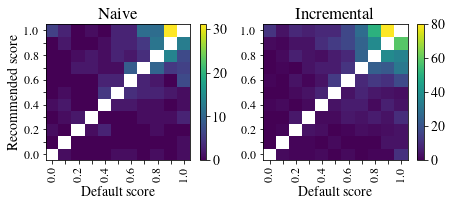

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
fig.subplots_adjust(bottom=0.25)

heatmap, xedges, yedges = np.histogram2d(score_default_ninc, score_recommended_ninc, bins=11)
mask = np.diag(np.ones(11))
masked_data = ma.masked_array(heatmap.T, mask)
cm.viridis.set_bad(color='white', alpha=None)
im1 = ax1.pcolormesh(masked_data, cmap=cm.viridis)
ax1.set_ylabel('Recommended score')
ax1.set_title('Naive')
ax1.set_xlabel('Default score')
ticks = ["{:.1f}".format(x) for x in np.linspace(0,1,11)]
ticksl = ["{:.1f}".format(x) if int(x*10)%2==0 else "" for x in np.linspace(0,1,11)]
ax1.set_xticks(np.arange(len(ticks))+.5, minor=False)
ax1.set_yticks(np.arange(len(ticks))+.5, minor=False)
ax1.set_xticklabels(ticksl, rotation=90, fontdict={'fontsize':12})
ax1.set_yticklabels(ticksl, fontdict={'fontsize':12})
ax1.figure.colorbar(im1, ax=ax1)


heatmap, xedges, yedges = np.histogram2d(score_default, score_recommended, bins=11)
mask = np.diag(np.ones(11))
masked_data = ma.masked_array(heatmap.T, mask)
cm.viridis.set_bad(color='white', alpha=None)
im2 = ax2.pcolormesh(masked_data, cmap=cm.viridis)
ax2.set_title('Incremental')
ax2.set_xlabel('Default score')
ticks = ["{:.1f}".format(x) for x in np.linspace(0,1,11)]
ticksl = ["{:.1f}".format(x) if int(x*10)%2==0 else "" for x in np.linspace(0,1,11)]
ax2.set_xticks(np.arange(len(ticks))+.5, minor=False)
ax2.set_yticks(np.arange(len(ticks))+.5, minor=False)
ax2.set_xticklabels(ticksl, rotation=90, fontdict={'fontsize':12})
ax2.set_yticklabels(ticksl, fontdict={'fontsize':12})
ax2.figure.colorbar(im2, ax=ax2)

fig = plt.gcf()
fig.set_size_inches(7.14, 3)
plt.savefig(experiment+'_score.pdf')